In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
X = df[['CreditScore', 'Age']].values
y = df['Exited'].values
X

array([[619,  42],
       [608,  41],
       [502,  42],
       ...,
       [709,  36],
       [772,  42],
       [792,  28]])

In [4]:
# Feature scaling
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [23]:
theta = np.zeros(X_b.shape[1])
learning_rate = 0.005
n_iterations = 5000

In [6]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [27]:
# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-5  # to avoid log(0) which is undefined
    cost = -1/m * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

# Gradient descent
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    b = 0
    cost_history = []
    for iteration in range(n_iterations):
        h = sigmoid(X.dot(theta))
        gradients = 1/m * X.T.dot(h - y)
        theta -= learning_rate * gradients
        b -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        if(iteration%500 == 0):
            print(gradients.shape)
            print("cost after ", iteration, "iteration is : ", cost)
    return theta, b, cost_history

In [28]:
# Train the model
theta, b, cost_history = gradient_descent(X_b, y, theta, learning_rate, n_iterations)

(3,)
cost after  0 iteration is :  0.4671448713998233
(3,)
cost after  500 iteration is :  0.46714461635533455
(3,)
cost after  1000 iteration is :  0.4671444710487499
(3,)
cost after  1500 iteration is :  0.46714438809663844
(3,)
cost after  2000 iteration is :  0.4671443406244246
(3,)
cost after  2500 iteration is :  0.46714431337287216
(3,)
cost after  3000 iteration is :  0.46714429766788135
(3,)
cost after  3500 iteration is :  0.46714428857226653
(3,)
cost after  4000 iteration is :  0.4671442832715123
(3,)
cost after  4500 iteration is :  0.46714428015811577


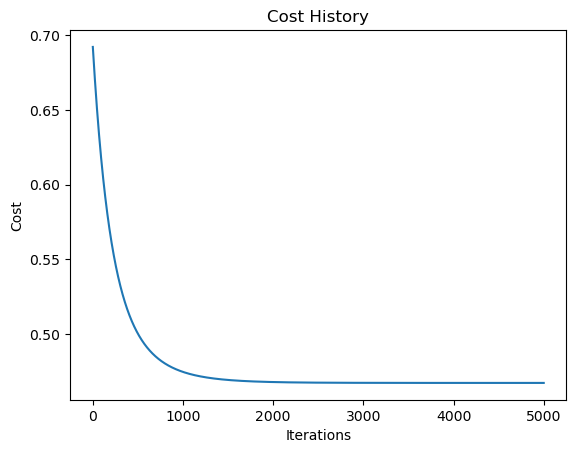

In [9]:
# Plotting the cost history
plt.plot(cost_history)
plt.title("Cost History")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [54]:
def predict(X, theta):
    h = sigmoid(X.dot(theta))
    return (h >= 0.5).astype(int)

def accuracy(X, y, theta):
    m = len(y)
    y_pred = predict(X, theta)
    accuracy = np.sum(y_pred == y) / m
    return accuracy


In [55]:
accuracy(X_b, y, theta)

0.7748